In [1]:
import numpy as np
import pandas as pd
import os
import re
import warnings
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import sys
sys.path

['C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators',
 'C:\\Program Files\\ArcGIS\\Pro\\Resources\\ArcPy',
 'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators',
 'C:\\Users\\keato\\Documents\\LocalRStudio\\EdX DSCI',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\python37.zip',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\DLLs',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\lib',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3',
 '',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\lib\\site-packages',
 'C:\\Program Files\\ArcGIS\\Pro\\bin',
 'C:\\Program Files\\ArcGIS\\Pro\\Resources\\ArcToolbox\\Scripts',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\lib\\site-packages\\future-0.18.2-py3.7.egg',
 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\lib\\site-packages\\pytz-2020.1-py3.7.egg',
 'C:\\Program Files\\ArcG

In [3]:
os.getcwd()

'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [4]:
from thon.choose import choose_features
from thon.churn import rollover, save_model, tree_importance, plot_eval, bake_pred
data = choose_features("data/out/features.csv", cv_range = (0, 10), save = False)

C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\keato\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+04, tolerance: 4.215e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

Alpha estimate: {'model__alpha': 9.5}
7 features selected 



In [4]:
#data = pd.read_csv("data/out/features.csv")

In [5]:
data.columns

Index(['month', 'n', 'totalsa_lag3', 'newhouses_lag3', 'laborpart_lag3',
       'industry_lag9', 'GT_lag3'],
      dtype='object')

In [6]:
# Training data
X, y = data.drop(columns = ['n']), data['n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, shuffle = False)

In [7]:
# Training data

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data
train_pred = pd.Series(model.predict(X_train), index=X_train.index)
test_pred = pd.Series(model.predict(X_test), index =X_test.index)

In [8]:
train_pred = train_pred.sort_index()
y_train = y_train.sort_index()
test_pred = test_pred.sort_index()
y_test = y_test.sort_index()

Predictions

1006.2094588409647


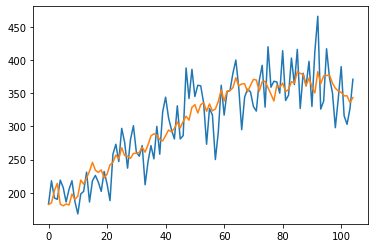

In [9]:
plot_eval(train_pred, y_train)

5168.203757649182


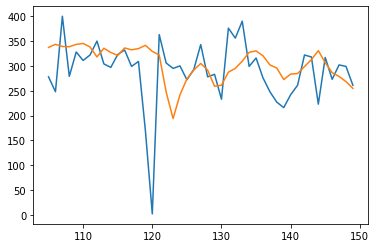

In [10]:

plot_eval(test_pred, y_test)
# why does it look like this???

In [11]:
from pandas.plotting import lag_plot, autocorrelation_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

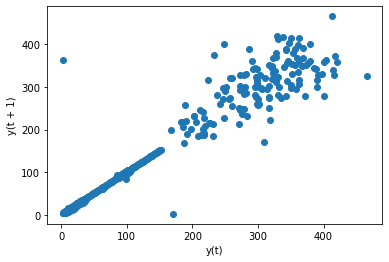

In [12]:
lag_plot(data, 1)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

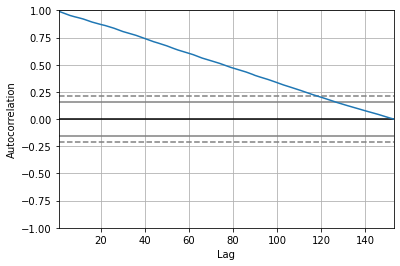

In [13]:
autocorrelation_plot(data)

In [13]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['importance'])


In [14]:
cdf

,importance
month,0.422369
totalsa_lag3,7.655789
newhouses_lag3,-8.492362
laborpart_lag3,12.617785
industry_lag9,2.662224
GT_lag3,3.334521


In [15]:
newdata = rollover(cdf)

C:\Users\keato\Documents\LocalRStudio\LJ_Leading_Indicators\thon\churn.py:33: UserWarning: Features are named incorrectly, they are led 3 months ahead of their label
  warnings.warn("Features are named incorrectly, they are led 3 months ahead of their label")


In [16]:
newdata

,month,totalsa_lag3,newhouses_lag3,laborpart_lag3,industry_lag9,GT_lag3
0,154,13.811,10.1,62.1,102.7820,12.28
1,155,13.740,8.3,62.4,103.4034,14.03
2,156,14.047,9.4,62.3,104.1409,10.09


In [17]:
pred = model.predict(newdata)

In [18]:
# combine train, test, and pred into 1 df
full = bake_pred(y_train, y_test, pred)

In [19]:
full.to_csv("data/out/linear.csv")

In [20]:
full

,n,group
0,183.000000,train
1,218.000000,train
2,192.000000,train
3,190.000000,train
4,219.000000,train
...,...,...
148,299.000000,test
149,261.000000,test
150,258.503007,pred
151,284.943119,pred
